In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [29]:
# Load data
df = pd.read_csv('amazon.csv')

# Quick data check
print(df.head())


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [27]:
# 🔍 Check null values & data types
df.info()
df.isnull().sum()

# Optionally: Drop rows with missing values (if few)
df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

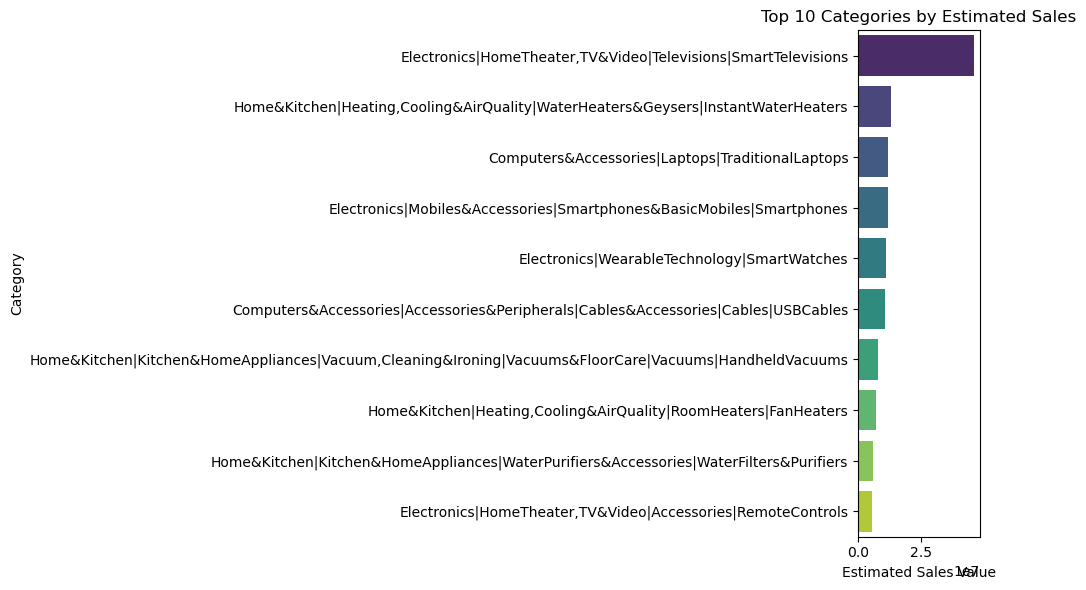

In [57]:

df['estimated_sales'] = df['discounted_price'] * df['rating_count']
top_categories = df.groupby("category")["estimated_sales"].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    hue=top_categories.index,        
    palette="viridis",
    dodge=False,
    legend=False                    
)
plt.title("Top 10 Categories by Estimated Sales")
plt.xlabel("Estimated Sales Value")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


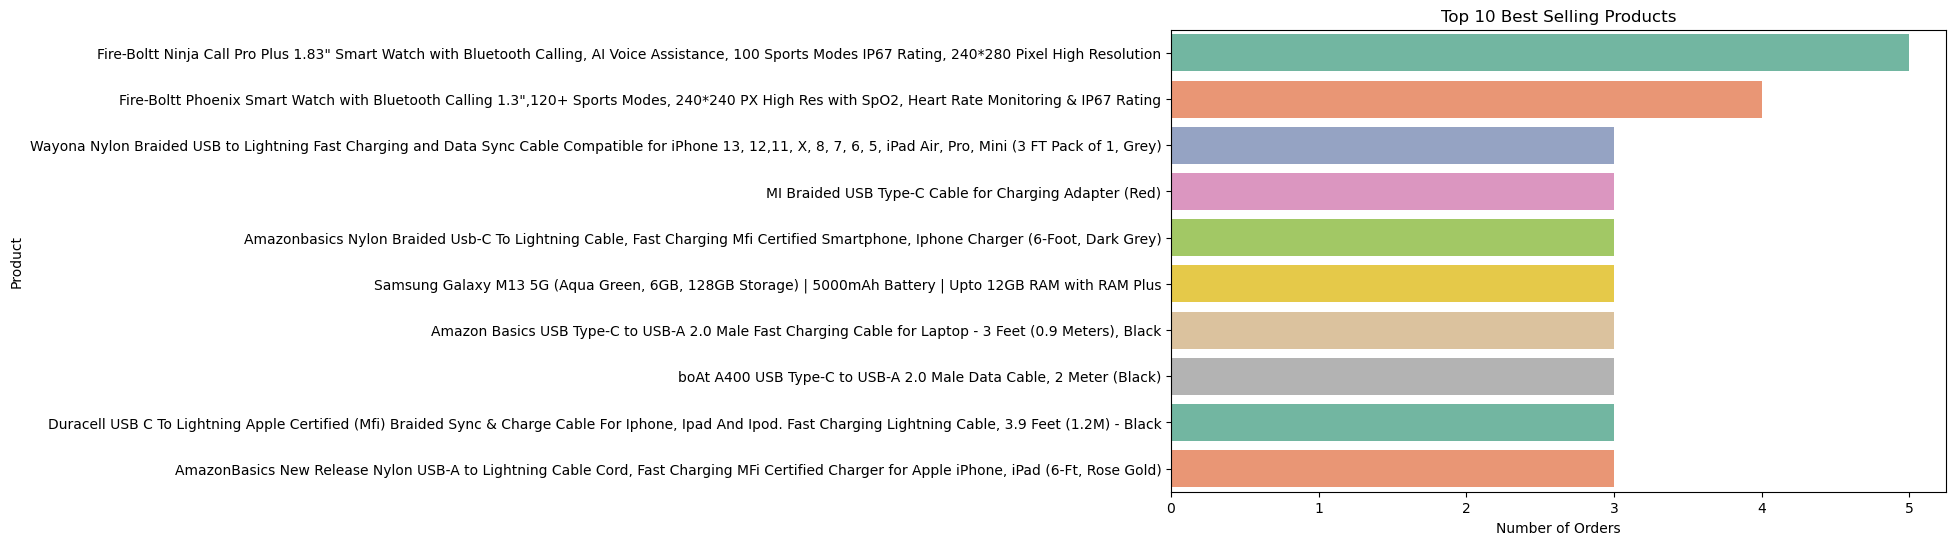

In [15]:
# Top 10 selling products
top_products = df['product_name'].value_counts().head(10).reset_index()
top_products.columns = ['product_name', 'order_count']

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='order_count', y='product_name',hue='product_name', palette='Set2')
plt.title("Top 10 Best Selling Products")
plt.xlabel("Number of Orders")
plt.ylabel("Product")
plt.show()


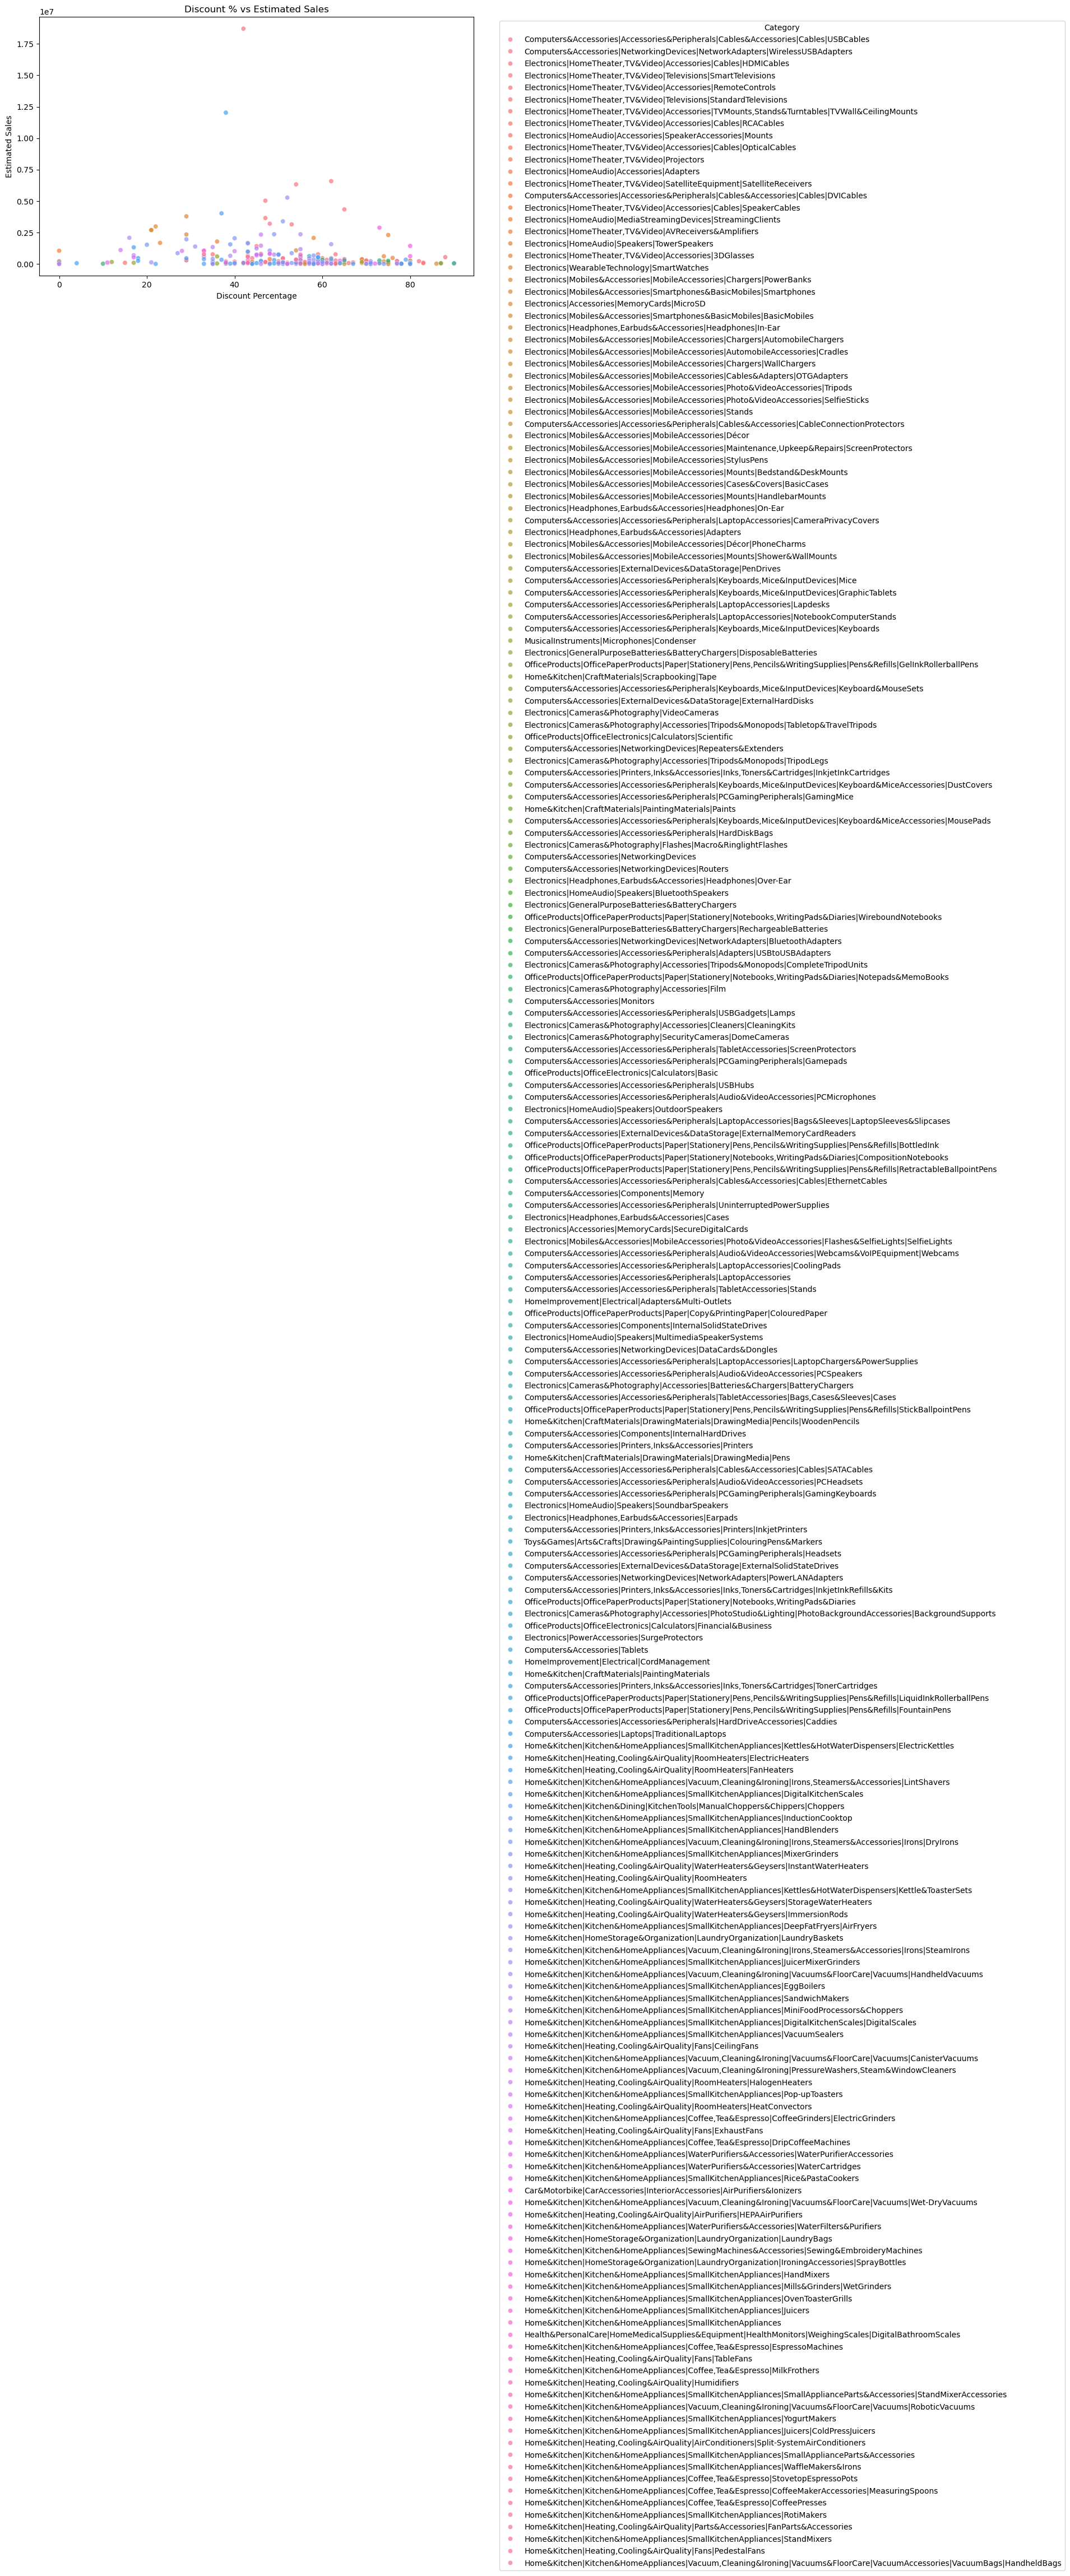

In [70]:
# Convert discount_percentage to float
df['discount_percentage'] = df['discount_percentage'].replace('%','').astype(float)

# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='discount_percentage', y='estimated_sales', hue='category', alpha=0.7)
plt.title("Discount % vs Estimated Sales")
plt.xlabel("Discount Percentage")
plt.ylabel("Estimated Sales")
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


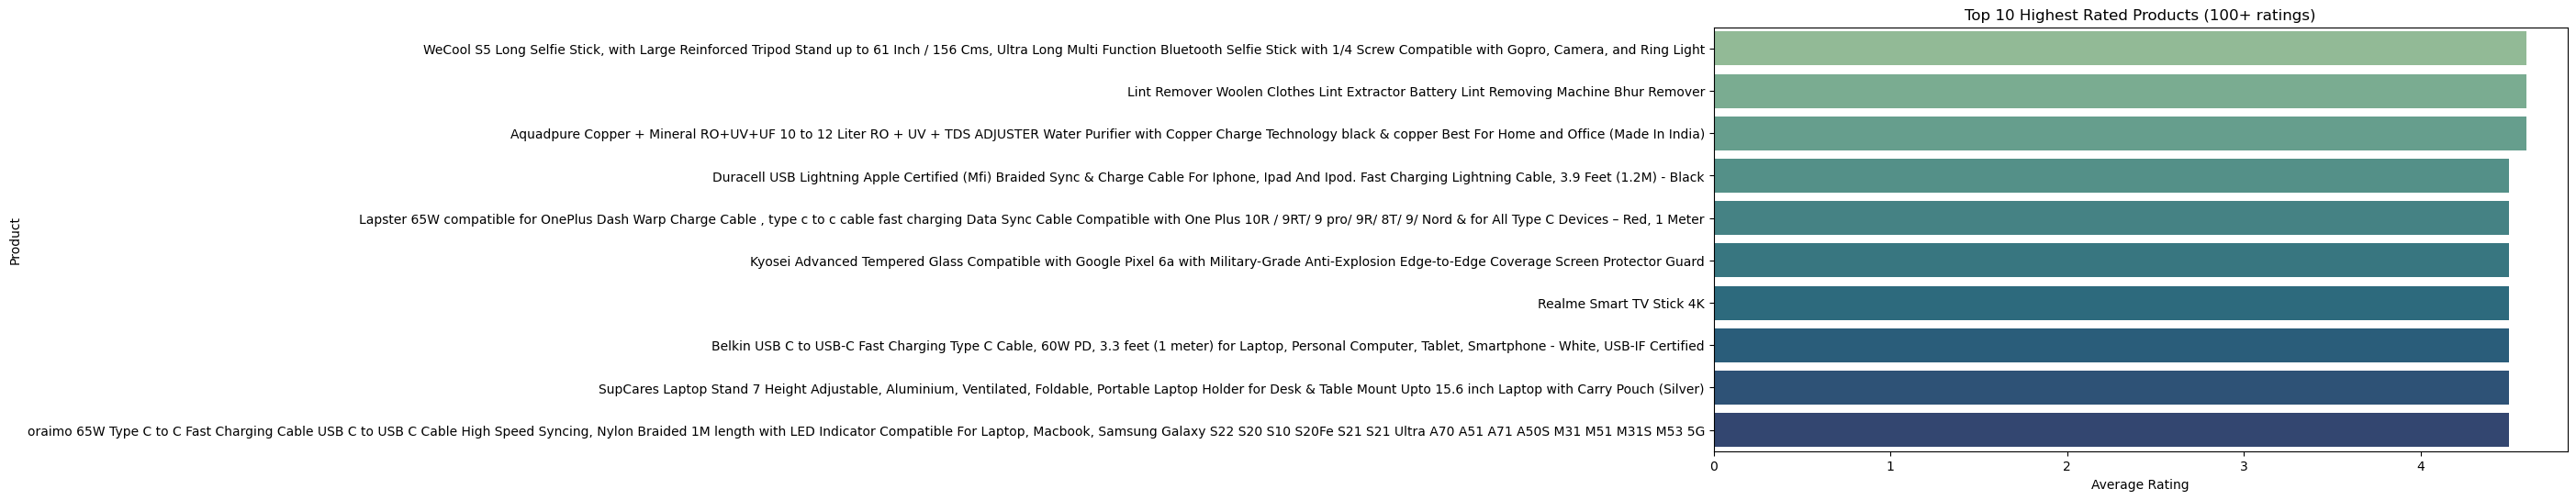

In [78]:
# Filter for products with sufficient ratings
filtered_df = df[df['rating_count'] > 100].copy()

# Convert rating to float
filtered_df['rating'] = pd.to_numeric(filtered_df['rating'], errors='coerce')

# Get top rated products
top_rated = filtered_df.sort_values(by='rating', ascending=False).drop_duplicates('product_name').head(10)

# Bar Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_rated['rating'], y=top_rated['product_name'], hue=top_rated['product_name'], palette='crest')
plt.title("Top 10 Highest Rated Products (100+ ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Product")
plt.show()


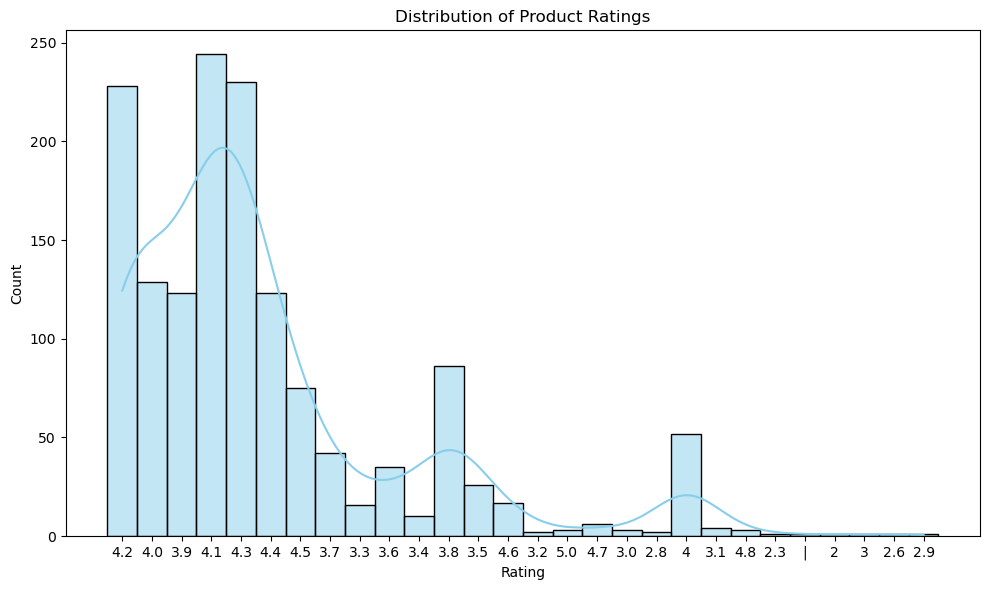

In [82]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='rating', bins=20, kde=True, color='skyblue')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
